In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [2]:
from stage0_configs import *
info = main_config()


Welcome to the Abaqus parameter calibration project


The configurations you have chosen: 

+------------------------+-------------+
|     Global Configs     | User choice |
+------------------------+-------------+
|   Optimize Strategy    |     SOO     |
|        Material        | DP1000_room |
|       Optimizer        |      BO     |
|     Hardening Law      |    Swift    |
|        Geometry        |    NDBR50   |
|   Deviation Percent    |      5      |
|    Run Initial Sims    |     yes     |
| Number of Initial Sims |      2      |
+------------------------+-------------+

Generating necessary directories

The path to your main project folder is

c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project



In [15]:
targetPath = info['targetPath'] 
target = pd.read_csv(f"{targetPath}/Force-Displacement.csv")
target['Force/N'] = target['Force/kN'] * 1000
# Save as a csv file
target.to_csv(f"{targetPath}/Force-Displacement.csv", index=False)

[0.0, 0.0300013, 0.0600056, 0.0899965, 0.119996, 0.150003, 0.179956, 0.209908, 0.23986, 0.269774, 0.299675, 0.329576, 0.359477, 0.389378, 0.419279, 0.44918, 0.479077, 0.508978, 0.538879, 0.56878, 0.598794, 0.628939, 0.659079, 0.68922, 0.719364, 0.749505, 0.779645, 0.80979, 0.83993, 0.870075, 0.900215, 0.930355, 0.9605, 0.99064, 1.02078, 1.05093, 1.08107, 1.11121, 1.14135, 1.17149, 1.20164, 1.23178, 1.26192, 1.29206, 1.3222, 1.35234, 1.38249, 1.41263, 1.44277, 1.47289, 1.50262, 1.53235, 1.56208, 1.5918, 1.62153, 1.65126, 1.68099, 1.71072, 1.74045, 1.77018, 1.80004, 1.83033, 1.86063, 1.89092, 1.92121, 1.95151, 1.9818, 2.01201, 2.04187, 2.07174, 2.1016, 2.13147, 2.16134, 2.1912, 2.22107, 2.25094, 2.2808, 2.31067, 2.34054, 2.3704, 2.40027, 2.43014, 2.46001, 2.48987, 2.51974, 2.54934, 2.57921, 2.60968, 2.63985, 2.6691, 2.69944, 2.72987, 2.75941, 2.78906, 2.81987, 2.84973, 2.87898, 2.9096, 2.93985, 2.96957, 2.99866]
1.963860843
1.4


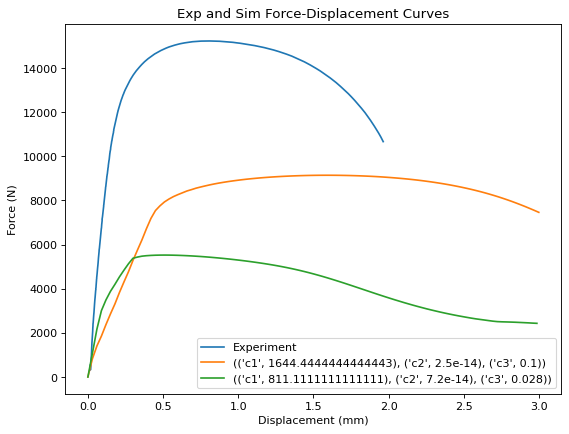

In [30]:
resultPath = info['resultPath']
initialResultPath = f"{resultPath}/initial/common"
FD_Curves = np.load(f"{initialResultPath}/FD_Curves.npy", allow_pickle=True).tolist()
print(list(FD_Curves.values())[0]['displacement'])

targetPath = info['targetPath'] 
# Load csv file
target = pd.read_csv(f"{targetPath}/Force-Displacement.csv")
expForce = target['Force/N'].to_numpy()
expDisplacement = target['Disp/mm'].to_numpy() 
print(max(expDisplacement))


maxDisp = ceil(1.32 * 10) / 10
print(maxDisp)
# Plotting all FD curves
figure(figsize=(8, 6), dpi=80)
plt.plot(expDisplacement, expForce, label='Experiment')
for param in FD_Curves:
    plt.plot(FD_Curves[param]['displacement'], FD_Curves[param]['force'], label=param)
plt.title('Exp and Sim Force-Displacement Curves')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.legend()
